### *Conclusão da analise exploratória:*

*############################################################################
############################################################################
############################################################################
############################################################################
##########################################

############################################################################
############################################################################
########

############################################################################
############################################################################
############################################################################
############################################################################
############################################################################
###############################################################*

# Insights

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/INSIGHTS.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.

**PDF** Baixe um documento com resultados de toda a análise. [Baixar pdf]()

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## Como a análise será realizada:

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Insights.jpg" alt="capa">

### **`Nossos objetivos`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise descritiva]()

### Importando os pacotes e os dados

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)

In [112]:
df = pd.read_csv('SINASC_RO_2019.csv').drop(columns='Unnamed: 0', axis=1)
df.head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril


##

## O rosto da sociedade

In [113]:
def line_graphic(list_dic, eixo_X, eixo_y, colors, names_line):
    fig = go.Figure()

    for dic, color, name_line in zip(list_dic, colors, names_line):
        fig.add_trace(go.Scatter(x=list(dic.keys()), y=list(dic.values()), mode='lines', name=name_line, line=dict(color=color)))
        fig.update_layout(plot_bgcolor="white", xaxis_title=eixo_y, yaxis_title=eixo_X)

    fig.show() # lightgrey turquoise # deepskyblue violet lightseagreen lightpink

### Nascimentos em 2019

In [114]:
nascimentos = df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([nascimentos], 'Quantidade', 'Datas', ['turquoise'], ['Nascimentos'])

#### Por sexo

In [115]:
meninos = df[df['SEXO'] == 'Masculino'].groupby('DTNASC')['DTNASC'].count().to_dict()
meninas = df[df['SEXO'] == 'Feminino'].groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([meninos, meninas], 'Quantidade', 'Datas', ['deepskyblue', 'lightpink'], ['Meninos', 'Meninas'])

#### Média de nascimentos por dia

In [233]:
media_nascimentos = list(df.groupby('DTNASC')['DTNASC'].count().to_dict().values())
media_nascimentos = sum(media_nascimentos) / len(media_nascimentos)

print(f'Média de nascimentos por dia em Rondônia no ano de 2019: {round(media_nascimentos, 2)} bebês por dia')

Média de nascimentos por dia em Rondônia no ano de 2019: 66.66 bebês por dia


#### Distribuição das colunas

In [116]:
def grafico_categoria(coluna:str, dataframe):
    coluna_dic = (dataframe[coluna].value_counts(normalize=True) * 100).round().to_dict()
    fig = px.bar(x=coluna_dic.values(), y=coluna_dic.keys(), title=f"Distribuição coluna: '{coluna}'") 
    fig.update_layout(plot_bgcolor="white", xaxis_title='Percentual %', yaxis_title='Categorias')
    fig.show()

In [117]:
cols = ['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'SEXO', 'RACACOR', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA', 
        'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES']

for col in cols:
    grafico_categoria(col, df)

### Raça e cor da pele

In [264]:
def Grafico_de_Pizza(labels, values, marker_colors, legend_title_text, text):
    fig = go.Figure(data = go.Pie(labels = labels,
                                values = values,
                                marker_colors = marker_colors,
                                hole = 0.5,
                                pull = [0.15, 0.15, 0.15, 0.15]))
    #Rótulos
    fig.update_traces(textposition = "outside", textinfo = "percent+label")
    #Legenda
    fig.update_layout(legend_title_text = legend_title_text,
                    legend = (dict(orientation = "h",
                                xanchor = "auto",
                                x = 0.5)))
    #Texto
    fig.update_layout(annotations = [dict(text = text,
                                        x = 0.5,
                                        y = 0.5,
                                        font_size = 18,
                                        showarrow = False)])
    fig.show()

In [268]:
reacas = ['Parda','Branca','Preta','Indígena']
percentual = [74, 21, 3, 2]
cores_marcadores = ["khaki", "MediumSeaGreen", "tomato", "limegreen"]

Grafico_de_Pizza(reacas, percentual, cores_marcadores, "Raça dos Bebês", "População")

In [118]:
def distribuicao_coluna(coluna, categoria, dataframe):
    # Criar a tabela de contingência e calcular os percentuais
    contingency_table = pd.crosstab(dataframe[coluna], dataframe[categoria], normalize='index') * 100

    # Resetar o índice para transformar o DataFrame em formato "long" para plotly
    contingency_table = contingency_table.reset_index().melt(id_vars=coluna, value_name='Percentual')

    # Configurar o gráfico
    fig = px.bar(
        contingency_table, 
        x=coluna, 
        y='Percentual', 
        color=categoria, 
        barmode='group',
        labels={'Percentual': 'Percentuale (%)', 'ESCMAE': 'Cetegorie'},
        title=f'Distribuição {categoria} e {coluna}'
    )

    fig.update_layout(plot_bgcolor="white")

    # Mostrar o gráfico
    fig.show()

#### Distribuição da escolaridade da mãe de acordo com o tom de pele do bebê

In [119]:
distribuicao_coluna('RACACOR', 'ESCMAE', df)

#### Sexo do bebê

In [120]:
distribuicao_coluna('RACACOR', 'SEXO', df)

#### Dia de cadastro

In [121]:
distribuicao_coluna('RACACOR', 'DTCADASTRO_DIA', df)

#### Média da quantidade total de filhos vivos Vs Raça do bebê

In [122]:
QTDFILTOTAL = df.groupby('RACACOR')['QTDFILTOTAL'].mean().sort_values(ascending=False).to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILTOTAL.keys()), y=list(QTDFILTOTAL.values()), mode='lines+markers', name='', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Raça do bebê', yaxis_title='Média da quantidade total de filhos', title='Média da quantidade total de filhos vivos Vs Raça do bebê')
fig.show()

#### Média da quantidade total de filhos mortos Vs Raça do bebê

In [123]:
QTDFILMORT = df.groupby('RACACOR')['QTDFILMORT'].mean().sort_values(ascending=False).to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILMORT.keys()), y=list(QTDFILMORT.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Raça do bebê', yaxis_title='Média da quantidade total de filhos mortos', title='Média da quantidade total de filhos mortos Vs Raça do bebê')
fig.show()

#### Média da quantidade total de filhos Vs Escolaridade da mãe

In [124]:
QTDFILTOTAL = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
QTDFILTOTAL = {chave: df.groupby('ESCMAE')['QTDFILTOTAL'].mean().to_dict()[chave] for chave in QTDFILTOTAL}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILTOTAL.keys()), y=list(QTDFILTOTAL.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Quantidade total de filhos', title='Média da quantidade total de filhos Vs Escolaridade da mãe')
fig.show()

#### Média da quantidade total de filhos mortos Vs Escolaridade da mãe

In [125]:
QTDFILMORT = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
QTDFILMORT = {chave: df.groupby('ESCMAE')['QTDFILMORT'].mean().to_dict()[chave] for chave in QTDFILMORT}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILMORT.keys()), y=list(QTDFILMORT.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Média da quantidade total de filhos mortos', title='Média da quantidade total de filhos mortos Vs Escolaridade da mãe')
fig.show()

In [126]:
df.groupby('RACACOR')['CONSULTAS'].mean().sort_values(ascending=False)

RACACOR
Amarela     3.830189
Branca      3.772989
Preta       3.733417
Parda       3.654141
Indígena    3.162234
Name: CONSULTAS, dtype: float64

##

## Comportamento da mãe de acordo com a idade

In [127]:
def splitter(idade:int):
    if (idade >= 10) & (idade <= 15): 
        return '10 à 15 anos'
    elif (idade >= 15) & (idade <= 20):
        return '15 à 20 anos'
    elif (idade >= 20) & (idade <= 25):
        return '20 à 25 anos'
    elif (idade >= 25) & (idade <= 30):
        return '25 à 30 anos'
    elif (idade >= 30) & (idade <= 35):
        return '30 à 35 anos'
    elif (idade >= 40) & (idade <= 45):
        return '40 à 45 anos'
    elif (idade >= 45) & (idade <= 50):
        return '45 à 50 anos'

In [128]:
df['faixa_mae'] = df['IDADEMAE'].apply(splitter)

In [129]:
PAIS = df[df['IDADEPAI'] != 0]
display(PAIS.head(5))
print(PAIS.shape)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,faixa_mae
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,15 à 20 anos
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,25 à 30 anos
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,None
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos


(7089, 41)


### Comparando a idade da mãe e do pai

In [130]:
PAIS['faixa_pai'] = PAIS['IDADEPAI'].apply(splitter)
PAIS['diferenca'] = abs(PAIS['IDADEMAE'] - PAIS['IDADEPAI'])

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_13004\4211842173.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_13004\4211842173.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Gráfico das idades

In [131]:
def grafico_faixas(minimo:int, maximo:int, X:str, hue:str):
    sns.displot(data = PAIS[(PAIS['IDADEMAE'] >= minimo) & (PAIS['IDADEMAE'] <= maximo)]
            ,x = X
            ,hue = hue
            ,bins = 10
            ,element = 'step'
            , kde = True
           )

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



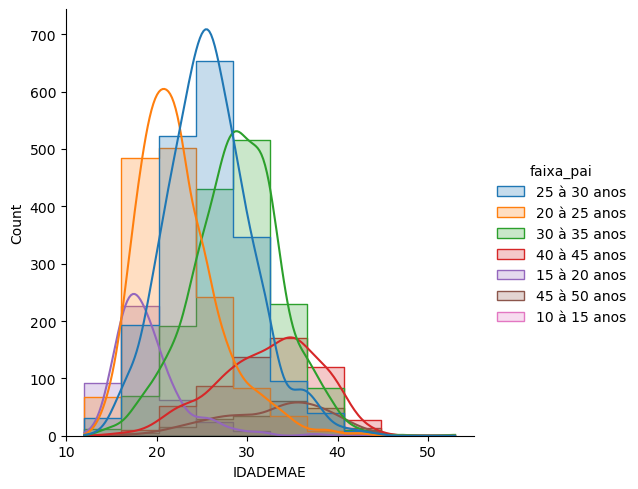

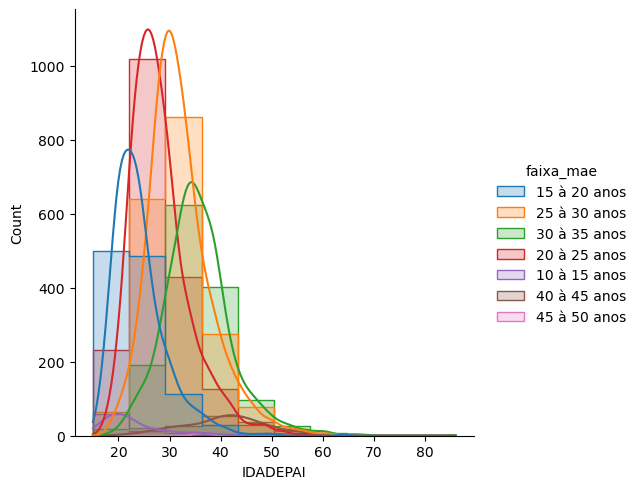

In [132]:
grafico_faixas(0, 80, 'IDADEMAE', 'faixa_pai')
grafico_faixas(0, 80, 'IDADEPAI', 'faixa_mae')

#### Pirâmide das idades

In [133]:
faixas = np.array(['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos', '30 à 35 anos', '40 à 45 anos', '45 à 50 anos'])

In [134]:
pais = {chave: PAIS.groupby('faixa_pai')['faixa_pai'].count().to_dict()[chave] for chave in faixas}
maes = {chave: PAIS.groupby('faixa_mae')['faixa_mae'].count().to_dict()[chave] for chave in faixas}

pais = np.array(list(pais.values()))
maes = np.array(list(maes.values()))

In [135]:
piramide = go.Figure()

piramide.add_trace(go.Bar(x = pais,
                         y = faixas,
                         orientation = "h",
                         name = "Pais",
                         marker = dict(color = "#32CD32")))

piramide.add_trace(go.Bar(x = -maes,
                         y = faixas,
                         orientation = "h",
                         name = "Mães",
                         marker = dict(color = "#E65CD9")))

piramide.update_layout(barmode = "overlay",
                      title = "Pirâmide das idades",
                      xaxis = dict(tickvals = [-2000, 0, 2000],
                                  title = "mil"),
                      plot_bgcolor = "white")

piramide.show()

#### Diferença média baseada na idade média da mãe

In [136]:
faixa_mae_media = ['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos',
                   '30 à 35 anos', '40 à 45 anos', '45 à 50 anos']
faixa_mae_media = {chave: PAIS.groupby('faixa_mae')['diferenca'].mean().to_dict()[chave] for chave in faixa_mae_media}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(faixa_mae_media.keys()), y=list(faixa_mae_media.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Idade média da mãe', yaxis_title='Diferença média de idade entre ela e o marido')

fig.show()

#### Escolaridade da mãe Vs diferença de idade entre ela e o marido:

In [137]:
ESCMAE = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
ESCMAE = {chave: PAIS.groupby('ESCMAE')['diferenca'].mean().to_dict()[chave] for chave in ESCMAE}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ESCMAE.keys()), y=list(ESCMAE.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Diferença de idade entre ela e o marido')
fig.show()

### Com base na raça e cor de pele

In [138]:
distribuicao_coluna('RACACOR', 'faixa_mae', df)

### Menores de idade

No início desta análise, decidimos não excluir a coluna na qual contém a idade do pai, apesar de ser `71% composta por dados nulos`. Então, agora chegou a hora de usar os `29% que nos resta`, faremos isso através de um algoritmo de `Machine Learning para preencher os dados nulos`.

#### Primeiro, tentamos encontrar algumas métricas com os dados que temos

In [139]:
total = PAIS[PAIS['IDADEMAE'] <= 18]
menores = PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)]

print(f'{total.shape[0]} mães tiveram filhos antes dos 18 anos. {round((total.shape[0] / PAIS.shape[0] * 100), 2)}% do total')
print(f'Dessas, {menores.shape[0]} tiveram filhos antes dos 18 anos com pais maiores que 18 anos ou seja {round((menores.shape[0] / total.shape[0] * 100), 2)}%')

627 mães tiveram filhos antes dos 18 anos. 8.84% do total
Dessas, 542 tiveram filhos antes dos 18 anos com pais maiores que 18 anos ou seja 86.44%


In [277]:
faixas = ['Maior de idade','Menor de idade com marido maior com + de 18 anos', 'Mãe e Pai menores de idade']
valores = [23705, 542, 85]
cores_marcadores = ["khaki", "MediumSeaGreen", "tomato"]

Grafico_de_Pizza(faixas, valores, cores_marcadores, "Raça dos Bebês", "População")

In [140]:
mdidmae = menores['IDADEMAE'].mean()
mdidpai = menores['IDADEPAI'].mean()
mddf = menores['diferenca'].mean()
print(f'Média idade mãe: {round(mdidmae, 2)}, Média idade pai: {round(mdidpai, 2)}, Média da diferença: {round(mddf, 2)}')

Média idade mãe: 16.9, Média idade pai: 23.96, Média da diferença: 7.06


#### Mães antes dos 18 - Quantidade de Registros e Diferença média de idade entre a mãe e o pai

In [141]:
qtd = menores.groupby('IDADEMAE')['diferenca'].count().round().to_dict()
media = menores.groupby('IDADEMAE')['diferenca'].mean().round().to_dict()
idades = [str(numero) for numero in qtd.keys()]

quantidade_registros = list(qtd.values())
media = list(media.values())

In [142]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Bar(x = idades,
                    y = quantidade_registros,
                    name = "Quantidade de Registros",
                    marker_color = "#32CD32"),
             secondary_y = False)

fig.add_trace(go.Scatter(x = idades,
                        y = media,
                        name = "Diferença média de idade",
                        mode = "lines",
                        line = dict(color = "crimson", 
                                   width = 4)),
             secondary_y = True)


fig.update_xaxes(title_text = "Idade da Mãe")

fig.update_yaxes(title_text = "Quantidade", secondary_y = False)
fig.update_yaxes(title_text = "Diferença", secondary_y = True)


fig.update_layout(plot_bgcolor = "white",
                 yaxis2 = dict(range = [0,35]),
                 title='Mães antes dos 18 - Quantidade de Registros e Diferença média de idade entre a mãe e o pai')

fig.show()

#### Diferença média de idade entre mãe e pai por raça

In [218]:
RACA = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA = {chave: PAIS.groupby('RACACOR')['diferenca'].mean().sort_values(ascending=False).to_dict()[chave] for chave in RACA}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(RACA.keys()), y=list(RACA.values()), mode='lines+markers', line=dict(color='turquoise'), name='APGAR1'))
fig.update_layout(plot_bgcolor="white", xaxis_title='', yaxis_title='Percentual %', title='Diferença média de idade entre mãe e pai por raça')
fig.show()

#### Diferença média de idade entre mãe e pai por raça, entre as que tiveram bebê antes dos 18 anos

In [215]:
RACA = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA = {chave: menores.groupby('RACACOR')['diferenca'].mean().sort_values(ascending=False).to_dict()[chave] for chave in RACA}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(RACA.keys()), y=list(RACA.values()), mode='lines+markers', line=dict(color='turquoise'), name='APGAR1'))
fig.update_layout(plot_bgcolor="white", xaxis_title='', yaxis_title='Percentual %', title='Diferença média de idade entre mãe e pai por raça')
fig.show()

#### Machine Learning

---

In [144]:
print(PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)]['RACACOR'].value_counts(), '\n')
print(PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)]['PARTO'].value_counts(), '\n')
print(PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)]['faixa_pai'].value_counts())

RACACOR
Parda       398
Branca      102
Preta        22
Indígena     18
Amarela       2
Name: count, dtype: int64 

PARTO
Cesáreo    387
Vaginal    155
Name: count, dtype: int64 

faixa_pai
20 à 25 anos    260
15 à 20 anos    140
25 à 30 anos     89
30 à 35 anos     36
40 à 45 anos      5
45 à 50 anos      1
Name: count, dtype: int64


In [145]:
menores['idades'] = menores['IDADEMAE'].astype(str) + ' Mãe - ' + menores['IDADEPAI'].astype(str) + ' Pai'

unique_idades = set(menores['idades'].to_list())

count_dict = {}

for idades in unique_idades:
    count_dict[idades] = menores['idades'].tolist().count(idades)

count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)[:18])

fig = px.bar(x=count_dict.values(), y=count_dict.keys(), title=f"") 
fig.update_layout(plot_bgcolor="white", xaxis_title='Quantidade', yaxis_title='Idades')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_13004\247210611.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
media = PAIS.groupby('faixa_mae')['diferenca'].mean().round()
massimo = PAIS.groupby('faixa_mae')['diferenca'].max()
minimo = PAIS.groupby('faixa_mae')['diferenca'].min()

display(pd.DataFrame({'Media': media, 'Massimo': massimo, 'Minimo': minimo}))

,Media,Massimo,Minimo
faixa_mae,,,
10 à 15 anos,8.0,25,1
15 à 20 anos,6.0,44,0
20 à 25 anos,6.0,35,0
25 à 30 anos,5.0,36,0
30 à 35 anos,5.0,54,0
40 à 45 anos,6.0,21,0
45 à 50 anos,10.0,12,9


In [147]:
media = PAIS.groupby('faixa_mae')['diferenca'].mean().round().to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(media.keys()), y=list(media.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Vendedores', yaxis_title='Valore')

fig.show()

In [148]:
def default(valore):
    if valore == '15 à 20 anos':
        return 1
    else:
        return 0

ML_model = PAIS.copy()
ML_model['default'] = ML_model['faixa_mae'].apply(default)

In [149]:
ML_model[['default']]#.value_counts()

,default
0,1
1,0
2,0
3,0
4,0
...,...
24325,0
24326,0
24327,0
24329,0


### A partir dos 35 anos, o que acontece?

##

## A escolha do tipo de parto | Cesario ou vaginal? E porque?

In [150]:
cesareo_df = df[df['PARTO'] == 'Cesáreo']
vaginal_df = df[df['PARTO'] == 'Vaginal']

In [151]:
# 'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'MESPRENAT', 'munResArea', 'DTNASC_DIA'

#### Nascimentos por tipo de parto

In [152]:
cesareo = cesareo_df.groupby('DTNASC')['DTNASC'].count().to_dict()
vaginal = vaginal_df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([cesareo, vaginal], 'Quantidade', 'Datas', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

In [153]:
percentual_parto = round((df['PARTO'].value_counts(normalize=True) * 100), 2).to_dict()
Vaginal_perc = percentual_parto['Vaginal']
Cesareo_perc = percentual_parto['Cesáreo']

print(f'Dos partos de 2019 {Cesareo_perc}% foram Cesáreo e {Vaginal_perc}% foram Vaginal')

Dos partos de 2019 67.73% foram Cesáreo e 32.27% foram Vaginal


### Escolaridade da Mãe

In [154]:
def paragone(colonna, df_01, df_02, dataframe):
    unique_values = dataframe[colonna].unique()
    value_to_order = {value: index + 1 for index, value in enumerate(unique_values)}

    df_01['valores'] = df_01[colonna].map(value_to_order)
    df_02['valores'] = df_02[colonna].map(value_to_order)
    media_01 = round((df_01['valores'].mean()), 2)
    media_02 = round((df_02['valores'].mean()), 2)

    return f"Média df_01: {media_01} e df_02: {media_02} | Diferença: {abs(media_01 - media_02)}"

#paragone('RACACOR', cesareo_df, vaginal_df, df)

In [155]:
distribuicao_coluna('ESCMAE', 'PARTO', df)

### Com base na idade da mãe

In [156]:
df['GESTACAO'].value_counts()

GESTACAO
37 a 41 semanas        21462
32 a 36 semanas         1993
42 semanas e mais        657
28 a 31 semanas          142
22 a 27 semanas           72
Menos de 22 semanas        6
Name: count, dtype: int64

In [157]:
def u():
    unique_ages = df['IDADEMAE'].unique().tolist()
    unique_ages.sort()

    dicionario_cesareo = {}
    dicionario_vaginal = {}

    for x in unique_ages:
        total_Cesareo, _ = df[(df['IDADEMAE'] == x) & (df['GESTACAO'] == '37 a 41 semanas')].shape
        total_Vaginal, _ = df[(df['IDADEMAE'] == x) & (df['GESTACAO'] == '32 a 36 semanas')].shape

        dicionario_cesareo[x] = total_Cesareo
        dicionario_vaginal[x] = total_Vaginal

    line_graphic([dicionario_cesareo, dicionario_vaginal], 'Quantidade', 'Idade da mãe', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

#u()

In [158]:
unique_ages = df['IDADEMAE'].unique().tolist()
unique_ages.sort()

dicionario_cesareo = {}
dicionario_vaginal = {}

In [159]:
for x in unique_ages:
    total_Cesareo, _ = df[(df['IDADEMAE'] == x) & (df['PARTO'] == 'Cesáreo')].shape
    total_Vaginal, _ = df[(df['IDADEMAE'] == x) & (df['PARTO'] == 'Vaginal')].shape

    dicionario_cesareo[x] = total_Cesareo
    dicionario_vaginal[x] = total_Vaginal

line_graphic([dicionario_cesareo, dicionario_vaginal], 'Quantidade', 'Idade da mãe', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

In [160]:
print(cesareo_df['QTDFILVIVO'].mean())
print(vaginal_df['QTDFILVIVO'].mean())

0.979004854368932
1.1583036169128884


### Com base na raça e cor da pele do bebê

In [161]:
distribuicao_coluna('RACACOR', 'PARTO', df)

##

In [219]:
df['munResNome'].unique()

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', 'Ariquemes',
       'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru', 'Rio Crespo',
       'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste', 'Ji-Paraná',
       'Buritis', 'Vilhena', 'Vale do Anari', 'Candeias do Jamari',
       'Costa Marques', 'Campo Novo de Rondônia', "Machadinho D'Oeste",
       'Colorado do Oeste', 'Nova Mamoré', 'Urupá', 'Ouro Preto do Oeste',
       'Corumbiara', 'São Miguel do Guaporé', 'Governador Jorge Teixeira',
       "Santa Luzia D'Oeste", 'Mirante da Serra', 'Cerejeiras',
       'Presidente Médici', 'Pimenta Bueno', 'Cacoal',
       "São Felipe D'Oeste", 'Parecis', "Espigão D'Oeste",
       'São Francisco do Guaporé', 'Ministro Andreazza',
       "Nova Brasilândia D'Oeste", "Alvorada D'Oeste",
       'Primavera de Rondônia', 'Seringueiras', 'Castanheiras',
       'Chupinguaia', 'Guajará-Mirim', 'Theobroma', 'Nova União',
       'Teixeirópolis', 'V

## Saúde das crianças nascidas

### APGAR5 & APGAR1

In [163]:
def APGAR(valor):
    if valor <= 5:
        return 'Baixo'
    elif (valor >= 6) & (valor <= 8):
        return 'Médio'
    else:
        return 'Alto'

In [164]:
df['APGAR5_status'] = df['APGAR5'].apply(APGAR)
df['APGAR1_status'] = df['APGAR1'].apply(APGAR)

In [165]:
APGAR = ['Alto', 'Médio', 'Baixo']
APGAR1 = {chave: round((df.APGAR1_status.value_counts(normalize=True) * 100), 2).to_dict()[chave] for chave in APGAR}
APGAR5 = {chave: round((df.APGAR5_status.value_counts(normalize=True) * 100), 2).to_dict()[chave] for chave in APGAR}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(APGAR1.keys()), y=list(APGAR1.values()), mode='lines+markers', line=dict(color='turquoise'), name='APGAR1'))
fig.add_trace(go.Scatter(x=list(APGAR5.keys()), y=list(APGAR5.values()), mode='lines+markers', line=dict(color='lightgrey'), name='APGAR5'))
fig.update_layout(plot_bgcolor="white", xaxis_title='', yaxis_title='Percentual%', title='APGAR1 & APGAR5')
fig.show()

In [166]:
distribuicao_coluna('faixa_mae', 'APGAR5_status', df)

In [167]:
print(df['APGAR5'].value_counts())
print(df['APGAR1'].value_counts())

APGAR5
9     14618
10     7542
8      1767
7       218
6        68
5        40
4        19
1        19
0        16
2        13
3        12
Name: count, dtype: int64
APGAR1
8     13309
9      7984
7      1800
6       491
5       229
10      213
4       102
3        92
2        62
1        25
0        25
Name: count, dtype: int64


In [168]:
df.groupby('ESCMAE')['APGAR1'].mean().sort_values(ascending=False)

ESCMAE
12 anos ou mais    8.260649
8 a 11 anos        8.121095
4 a 7 anos         8.065455
Nenhuma            8.000000
1 a 3 anos         7.917595
Name: APGAR1, dtype: float64

In [169]:
df[df['APGAR1'] == 10]['ESCMAE'].value_counts()

ESCMAE
12 anos ou mais    96
8 a 11 anos        88
4 a 7 anos         27
1 a 3 anos          2
Name: count, dtype: int64

In [170]:
df.groupby('RACACOR')['APGAR1'].mean().sort_values(ascending=False)

RACACOR
Branca      8.212910
Amarela     8.150943
Parda       8.118395
Preta       8.108886
Indígena    8.047872
Name: APGAR1, dtype: float64

In [171]:
df.groupby('munResNome')['APGAR1'].mean().sort_values(ascending=False).head(10)

munResNome
Buritis                   8.528369
Vale do Paraíso           8.358974
Campo Novo de Rondônia    8.335404
Candeias do Jamari        8.320285
Ouro Preto do Oeste       8.311987
Porto Velho               8.271511
Itapuã do Oeste           8.268817
Corumbiara                8.264000
Guajará-Mirim             8.254386
Vilhena                   8.243261
Name: APGAR1, dtype: float64

In [172]:
df.groupby('munResNome')['APGAR5'].mean().sort_values(ascending=False).head(10)

munResNome
Buritis                   9.718085
Campo Novo de Rondônia    9.521739
Seringueiras              9.403846
São Miguel do Guaporé     9.397626
São Felipe D'Oeste        9.377358
Nova Mamoré               9.367089
Mirante da Serra          9.350318
Monte Negro               9.325843
Urupá                     9.320513
Guajará-Mirim             9.315789
Name: APGAR5, dtype: float64

In [173]:
# Inicializa dicionários aninhados para 'Cesáreo' e 'Vaginal'
agrupado = {
    'Cesáreo': {},
    'Vaginal': {}
}

# Popula os dicionários aninhados
for (tipo, raca), valor in df.groupby(['PARTO', 'RACACOR'])['APGAR5'].mean().to_dict().items():
    if tipo in agrupado:
        agrupado[tipo][raca] = round(valor, 2)

# Ordena as raças dentro de cada tipo
for tipo in agrupado:
    agrupado[tipo] = {raca: agrupado[tipo][raca] for raca in sorted(agrupado[tipo])}

agrupado

{'Cesáreo': {'Amarela': 9.24,
  'Branca': 9.29,
  'Indígena': 9.03,
  'Parda': 9.14,
  'Preta': 9.13},
 'Vaginal': {'Amarela': 9.17,
  'Branca': 9.16,
  'Indígena': 9.16,
  'Parda': 9.2,
  'Preta': 9.19}}

### Período de gestação

In [174]:
def GESTACAO(valor):
    if(valor == 'Menos de 22 semanas') | (valor == '22 a 27 semanas'):
        return 'Baixo'
    elif (valor == '28 a 31 semanas') | (valor == '42 semanas e mais'):
        return 'Médio'
    else:
        return 'Alto'

In [175]:
df['GESTACAO_status'] = df['GESTACAO'].apply(GESTACAO)

#### Com base na raça e cor de pele

In [176]:
distribuicao_coluna('RACACOR', 'GESTACAO', df)

##

## Desenvolvimento social e econômico por município

In [177]:
total_mun = len(list(set(df['munResNome'].to_list())))
print(f'Existem: {total_mun} municípios')

Existem: 52 municípios


In [178]:
# ATTENZIONE: SI PREGA DI NON FIDARSI DI QUESTI NUMERI

muni_dif = PAIS.groupby('munResNome')['diferenca'].mean().round(2).sort_values(ascending=False).to_dict()
muni_apga5 = PAIS.groupby('munResNome')['APGAR5'].mean().round(2).sort_values(ascending=False).to_dict()
total_partos_por_cidade = []

for x in list(muni_dif.keys()):
    t, _ = PAIS[PAIS['munResNome'] == x].shape
    total_partos_por_cidade.append(t)

pd.DataFrame({'Municipio': list(muni_dif.keys()),
              'Média da diferença': list(muni_dif.values()),
              'APGAR5 Médio': list(muni_apga5.values()),
              'Total de patos': total_partos_por_cidade})

,Municipio,Média da diferença,APGAR5 Médio,Total de patos
0,Itapuã do Oeste,14.20,10.00,5
1,Monte Negro,9.24,9.93,21
2,Alto Paraíso,8.25,9.90,4
3,Parecis,8.00,9.90,36
4,Ariquemes,7.92,9.85,13
5,Buritis,7.29,9.83,62
6,Ministro Andreazza,6.97,9.81,73
7,Seringueiras,6.66,9.77,32
8,Nova Mamoré,6.58,9.75,31
9,Candeias do Jamari,6.57,9.75,14


---

## Rascunhos

In [179]:
list(set(df[df['RACACOR'] == 'Indígena']['munResNome'].to_list()))

['Nova Mamoré',
 'Seringueiras',
 'Parecis',
 'Porto Velho',
 'Ji-Paraná',
 'Cacoal',
 'Jaru',
 'Candeias do Jamari',
 'Chupinguaia',
 "Espigão D'Oeste",
 'Vilhena',
 'Cujubim',
 "Alvorada D'Oeste",
 'Mirante da Serra',
 "Alta Floresta D'Oeste",
 'Governador Jorge Teixeira',
 'Costa Marques',
 'Pimenta Bueno',
 'Guajará-Mirim',
 'São Francisco do Guaporé',
 'Pimenteiras do Oeste',
 'Buritis',
 'Rolim de Moura',
 'Alto Alegre dos Parecis']

In [180]:
"""import plotly.graph_objects as go

# Dati di esempio
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3'] # Carnagione
valori_gruppo1 = [20, 14, 23] # Categorie
valori_gruppo2 = [15, 18, 27]
valori_gruppo3 = [25, 22, 19]

# Creazione delle barre per ciascun gruppo
barra1 = go.Bar(name='Gruppo 1', x=categorie, y=valori_gruppo1)
barra2 = go.Bar(name='Gruppo 2', x=categorie, y=valori_gruppo2)
barra3 = go.Bar(name='Gruppo 3', x=categorie, y=valori_gruppo3)

layout = go.Layout(plot_bgcolor="white", barmode='group', title='Grafico a Barre con Tre Gruppi')
fig = go.Figure(data=[barra1, barra2, barra3], layout=layout)

fig.show()"""

'import plotly.graph_objects as go\n\n# Dati di esempio\ncategorie = [\'Categoria 1\', \'Categoria 2\', \'Categoria 3\'] # Carnagione\nvalori_gruppo1 = [20, 14, 23] # Categorie\nvalori_gruppo2 = [15, 18, 27]\nvalori_gruppo3 = [25, 22, 19]\n\n# Creazione delle barre per ciascun gruppo\nbarra1 = go.Bar(name=\'Gruppo 1\', x=categorie, y=valori_gruppo1)\nbarra2 = go.Bar(name=\'Gruppo 2\', x=categorie, y=valori_gruppo2)\nbarra3 = go.Bar(name=\'Gruppo 3\', x=categorie, y=valori_gruppo3)\n\nlayout = go.Layout(plot_bgcolor="white", barmode=\'group\', title=\'Grafico a Barre con Tre Gruppi\')\nfig = go.Figure(data=[barra1, barra2, barra3], layout=layout)\n\nfig.show()'

In [181]:
"""# Criar a tabela de contingência
contingency_table = pd.crosstab(df['RACACOR'], df['ESCMAE']).reset_index()

# Transformar para formato long
contingency_table = contingency_table.melt(id_vars='RACACOR', value_name='Count', var_name='ESCMAE')

# Criar o gráfico com Plotly
fig = px.bar(contingency_table, x='RACACOR', y='Count', color='ESCMAE', barmode='group',
             labels={'RACACOR': 'Raça/Cor', 'Count': 'Contagem', 'ESCMAE': 'Escolaridade Materna'},
             title='Distribuição de Escolaridade Materna (ESCMAE) por Raça/Cor (RACACOR)')

# Mostrar o gráfico
fig.show()"""

"# Criar a tabela de contingência\ncontingency_table = pd.crosstab(df['RACACOR'], df['ESCMAE']).reset_index()\n\n# Transformar para formato long\ncontingency_table = contingency_table.melt(id_vars='RACACOR', value_name='Count', var_name='ESCMAE')\n\n# Criar o gráfico com Plotly\nfig = px.bar(contingency_table, x='RACACOR', y='Count', color='ESCMAE', barmode='group',\n             labels={'RACACOR': 'Raça/Cor', 'Count': 'Contagem', 'ESCMAE': 'Escolaridade Materna'},\n             title='Distribuição de Escolaridade Materna (ESCMAE) por Raça/Cor (RACACOR)')\n\n# Mostrar o gráfico\nfig.show()"

In [182]:
df.columns

Index(['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'QTDFILTOTAL', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
       'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
       'DTCADASTRO', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT',
       'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt',
       'munResArea', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA',
       'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'faixa_mae',
       'APGAR5_status', 'APGAR1_status', 'GESTACAO_status'],
      dtype='object')

In [183]:
df[(df['QTDFILVIVO'] == 0) & (df['QTDFILMORT'] == 0)].head(1)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,faixa_mae,APGAR5_status,APGAR1_status,GESTACAO_status
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,15 à 20 anos,Alto,Alto,Alto


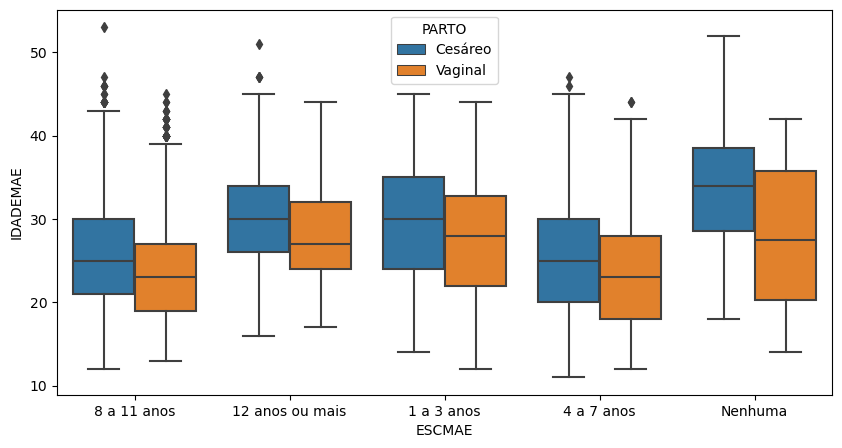

In [184]:
plt.close('all')
plt.rc('figure', figsize=(10, 5))

sns.boxplot(data = df, y="IDADEMAE", x="ESCMAE", orient="v", hue='PARTO')
plt.show()

In [185]:
df.groupby('RACACOR')['CONSPRENAT'].mean()

RACACOR
Amarela     8.669811
Branca      8.695929
Indígena    6.188830
Parda       8.206261
Preta       8.744681
Name: CONSPRENAT, dtype: float64

<Axes: xlabel='ESCMAE'>

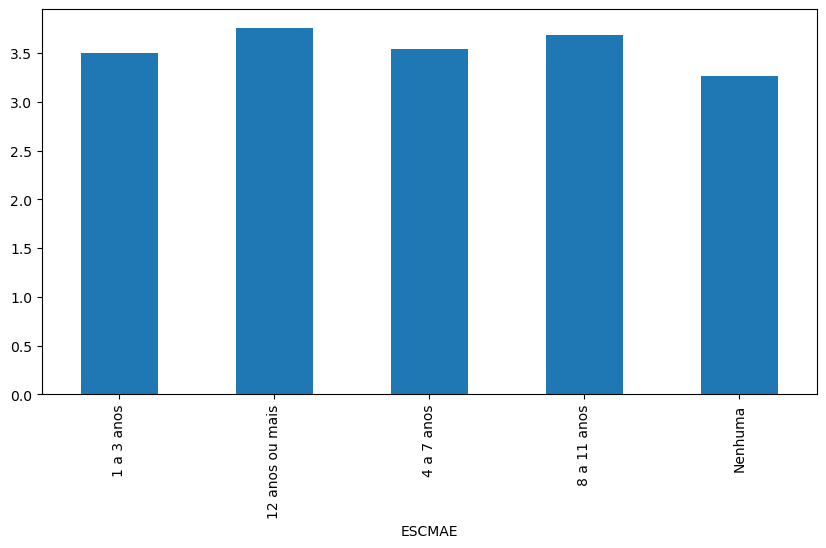

In [186]:
df.groupby('ESCMAE')['CONSULTAS'].mean().plot(kind='bar')

## ML Model

In [187]:
from MLmodel import Variabile_Migliore

In [188]:
df.head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,faixa_mae,APGAR5_status,APGAR1_status,GESTACAO_status
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,15 à 20 anos,Alto,Alto,Alto
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,25 à 30 anos,Alto,Médio,Alto
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,None,Alto,Médio,Alto
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos,Alto,Alto,Alto
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos,Alto,Médio,Alto


In [189]:
df['ESCMAE'].value_counts()

ESCMAE
8 a 11 anos        14435
12 anos ou mais     5118
4 a 7 anos          4293
1 a 3 anos           449
Nenhuma               37
Name: count, dtype: int64

In [190]:
PAIS.columns

Index(['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'QTDFILTOTAL', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
       'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
       'DTCADASTRO', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT',
       'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt',
       'munResArea', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA',
       'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'faixa_mae',
       'faixa_pai', 'diferenca'],
      dtype='object')

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



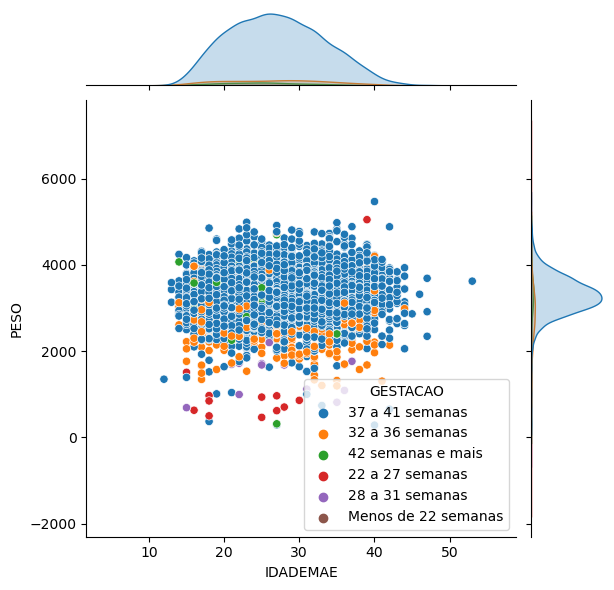

In [191]:
sns.jointplot(data=PAIS
              , x="IDADEMAE"
              , y="PESO"
              , hue = 'GESTACAO')

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



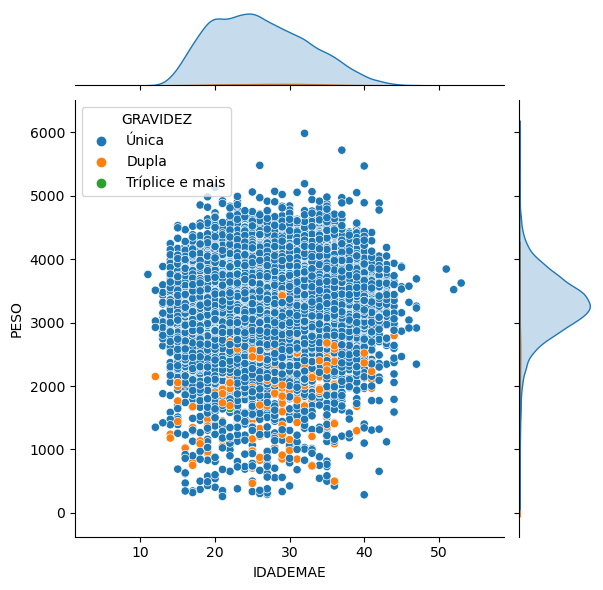

In [192]:
sns.jointplot(data=df
              , x="IDADEMAE"
              , y="PESO"
              , hue = 'GRAVIDEZ')

In [193]:
"""ML = df.copy()
ML['default'] = [1 if valore <= 2800 else 0 for valore in ML['PESO']]
ML = ML[['IDADEMAE', 'GRAVIDEZ', 'IDADEMAE', 'RACACOR', 'default']]

Variabile_Migliore(ML, 'default')#.to_csv('l.csv')"""

"ML = df.copy()\nML['default'] = [1 if valore <= 2800 else 0 for valore in ML['PESO']]\nML = ML[['IDADEMAE', 'GRAVIDEZ', 'IDADEMAE', 'RACACOR', 'default']]\n\nVariabile_Migliore(ML, 'default')#.to_csv('l.csv')"

---

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>